<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Python for Data Analysis II
                    <br><br>
                    <em> Daniel Sierra Ramos </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# **S10: MODEL SELECTION - HYPERPARAMETER TUNING**

 - Model selection is the process to **select the best possible model** that fits our data and generalize well on unseen data.
 - As we already know, model have internal parameters that are optimized during the training process. We **cannot set direcly those parameter values** because they are learned through the optimization process (well, we can influece on their values through regularization).
 - But also, models usually can be controlled by the **hyperparameters**, that is, external arguments that influences the training process. One typical hyperparameter is the *regularization strengh* in Logistic Regression and SVMs, or the depth in Decision Trees.
 - **Each hyperparameter is creating a diferent model** (with different parameters), but we cannot know which hyperparameter configuration is the best for our problem.
 - For this purpose, we have model selection techniques to test several configurations in order to keep the best. The most known are:
    - **Grid Search** - Creates a grid of hyperparamenters and builds a model for each combination. It's usually used in combination with K-Fold CV. It's slow because it tries all parameter combinations by brute force.
    - **Random Search** - Randomly selects N combinations from the hyperparameter grid. It's based on the idea that most of combinations of hyperparamenters will not improve the model, so there is no need to test all of them.

## Model Selection with `sklearn`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "none"

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

Let's fetch the Breast Cancer dataset and split it into train and test sets.

In [4]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### `GridSearchCV`

Our classifier will be a SVM, for which we want to find the best hyperparameters. We will use a grid search to find the best combination of hyperparameters.

The hyperparameters that we are going to tune are:

 - `C` - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
 - `kernel` - Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

In [5]:
clf = svm.SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100]
}

It's called a Grid Search because we are going to create a grid of hyperparameters and try all combinations. 

We will use a 3-fold cross-validation to evaluate the performance of each combination of hyperparameters.

In [10]:
# combination of hyper-parameters
import itertools

kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10, 100]

list(itertools.product(kernels, C_values))


[('linear', 0.1),
 ('linear', 1),
 ('linear', 10),
 ('linear', 100),
 ('rbf', 0.1),
 ('rbf', 1),
 ('rbf', 10),
 ('rbf', 100)]

We have 8 combinations of hyperparameters, so we will train 8 models and evaluate them with 3-fold CV. This means that we will train 24 models in total.

In [6]:
%%time

grid = GridSearchCV(clf, param_grid=parameters, cv=3)
grid.fit(X_train, y_train)

CPU times: user 16.4 s, sys: 52.9 ms, total: 16.4 s
Wall time: 16.5 s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']})

In [7]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

Let's see all the results, not only the best one

In [12]:
grid.cv_results_

{'mean_fit_time': array([6.24368985e-02, 1.46404902e-03, 4.04681285e-01, 1.11325582e-03,
        1.96932666e+00, 9.31262970e-04, 2.99414500e+00, 1.02639198e-03]),
 'std_fit_time': array([2.26378576e-02, 5.80568686e-05, 4.28160803e-01, 4.07839044e-05,
        1.36911407e+00, 5.30715687e-05, 1.48081143e+00, 2.47687721e-05]),
 'mean_score_time': array([0.00057602, 0.00157499, 0.00046595, 0.00108004, 0.00043027,
        0.00083176, 0.0004166 , 0.00073965]),
 'std_score_time': array([1.67472831e-04, 3.35913644e-05, 2.80756367e-05, 2.44360628e-05,
        1.01979504e-05, 5.98813100e-05, 8.47271633e-06, 5.32246301e-05]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, Fal

Let's convert the results into a DataFrame

In [14]:
# converting the results dictionary into a dataframe
df = pd.DataFrame(grid.cv_results_)

df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062437,0.022638,0.000576,0.000167,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.947368,0.956140,0.982301,0.961937,0.014838,1
1,0.001464,0.000058,0.001575,0.000034,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.842105,0.868421,0.884956,0.865161,0.017645,8
2,0.404681,0.428161,0.000466,0.000028,1,linear,"{'C': 1, 'kernel': 'linear'}",0.938596,0.964912,0.973451,0.958987,0.014834,2
3,0.001113,0.000041,0.001080,0.000024,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.868421,0.903509,0.911504,0.894478,0.018712,7
4,1.969327,1.369114,0.000430,0.000010,10,linear,"{'C': 10, 'kernel': 'linear'}",0.956140,0.938596,0.973451,0.956063,0.014230,3
5,0.000931,0.000053,0.000832,0.000060,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.877193,0.921053,0.929204,0.909150,0.022841,6
6,2.994145,1.480811,0.000417,0.000008,100,linear,"{'C': 100, 'kernel': 'linear'}",0.956140,0.921053,0.964602,0.947265,0.018854,4
7,0.001026,0.000025,0.000740,0.000053,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.885965,0.921053,0.938053,0.915024,0.021688,5


<AxesSubplot:ylabel='params'>

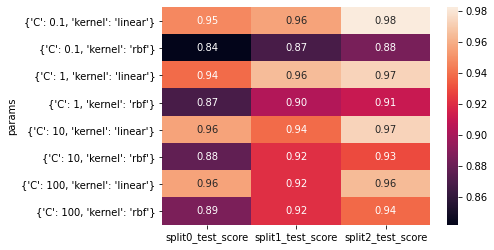

In [16]:
# plot test scores for each combination of hyper-parameters in each split as a heatmap
import seaborn as sns

test_scores = df.set_index("params")[["split0_test_score", "split1_test_score", "split2_test_score"]]

sns.heatmap(test_scores, annot=True, fmt=".2f")

### `RandomizedSearchCV`

We can also use a Randomized Search to find the best hyperparameters. It's faster than a Grid Search because it doesn't try all combinations, but it's not as accurate as a Grid Search, obviously.

It works in the same way as a Grid Search, but instead of trying all combinations, it randomly selects a fixed number of combinations from the hyperparameter grid.

In [34]:
params = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
}

random_grid = RandomizedSearchCV(
    clf, 
    scoring="accuracy",
    param_distributions=params, 
    cv=3, 
    n_iter=20 # the lower, the faster and less accurate
)

random_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                              50, 100],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [35]:
random_grid.best_params_

{'kernel': 'linear', 'C': 5}

In [37]:
results = pd.DataFrame(random_grid.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001845,0.000304,0.000568,0.000058,poly,10,"{'kernel': 'poly', 'C': 10}",0.877193,0.903509,0.929204,0.903302,0.021234,11
1,0.000944,0.000029,0.000450,0.000025,poly,0.5,"{'kernel': 'poly', 'C': 0.5}",0.868421,0.885965,0.893805,0.882730,0.010612,15
2,0.001017,0.000128,0.000375,0.000020,poly,100,"{'kernel': 'poly', 'C': 100}",0.885965,0.912281,0.911504,0.903250,0.012227,12
3,0.001895,0.000101,0.001997,0.000059,rbf,0.05,"{'kernel': 'rbf', 'C': 0.05}",0.842105,0.850877,0.876106,0.856363,0.014413,19
4,0.000972,0.000002,0.000485,0.000017,poly,0.1,"{'kernel': 'poly', 'C': 0.1}",0.842105,0.877193,0.884956,0.868085,0.018642,16


In [39]:
results.iloc[results["mean_test_score"].idxmax()]["params"]

{'kernel': 'linear', 'C': 5}